In [ ]:
# Standard Library Imports
import os
import random

# Scientific
import numpy as np
import os
import argparse
import cv2
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Conv2D,Activation,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

import random # When you split your dataset into training and validation sets, you typically want to shuffle the data so that the selection of images for each set is random.
random.seed(43) # If you don’t set a seed, the shuffling will be different every time you run the code,
import numpy as np  # for numerical operations
import os  # for file and directory operations
from PIL import Image  # for image loading and processing
import glob  # for finding image files
# Optional: Keep only if you need visualization
import matplotlib.pyplot as plt  # for plotting images
# Optional: Keep only if you need data manipulation
import pandas as pd  # for handling data frames if necessary& Data Processing Libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# TensorFlow / Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Dense, Flatten, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0, ResNet50, EfficientNetB3, EfficientNetB1, EfficientNetB2

# Scikit-Learn Libraries
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import os
import argparse
import cv2
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Conv2D,Activation,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

import random # When you split your dataset into training and validation sets, you typically want to shuffle the data so that the selection of images for each set is random.
random.seed(43) # If you don’t set a seed, the shuffling will be different every time you run the code,
import numpy as np  # for numerical operations
import os  # for file and directory operations
from PIL import Image  # for image loading and processing
import glob  # for finding image files
# Optional: Keep only if you need visualization
import matplotlib.pyplot as plt  # for plotting images
# Optional: Keep only if you need data manipulation
import pandas as pd  # for handling data frames if necessary

In [ ]:

#-----------------------------------------------------------
def get_all_files(folder,folder2):
    file_list = []
    label=[]
    if os.path.exists(folder):
        for root, dirs, files in os.walk(folder):
            for file in files:
                file_list.append(os.path.join(root,file))
                label.append(1)

    if os.path.exists(folder2):
        for root, dirs, files in os.walk(folder2):
            for file in files:
                file_list.append(os.path.join(root,file))
                label.append(0)
    return file_list,label
#-------------------------------------------------------------

#-------------------------------------------------------------
# Paths to the folders
# Paths to the folders in Kaggle
smiles_folder = '/kaggle/input/maybeeee/SmileClassification_Dataset/training/positives_Smile'
not_smiles_folder = '/kaggle/input/maybeeee/SmileClassification_Dataset/training/negatives_No_Smile'



# Call the function with the local folder paths
file_list, labels = get_all_files(smiles_folder, not_smiles_folder) # combines the two folders



data = pd.DataFrame(data=file_list, columns=['path'])
label = pd.DataFrame(data=labels, columns=['label'])
data = pd.concat([data, label], axis=1)
#--------------------------------------------------------------

#--------------------------------------------------------------
# Shuffle and split data into training and validation sets
# msk = np.random.rand(len(data)) < 0.70  # 0.80
# data_train = data[msk]  # 70% of the data
# data_valid = data[~msk]  # 30% of the data
#--------------------------------------------------------------
#--------------------------------------------------------------

# The **dataextractor** function is designed to:
# Load images from the specified file paths.
# Convert the images to grayscale.
# Resize the images to a consistent shape (usually specified as height and width).
# Normalize the pixel values (scaling them between 0 and 1) for better model training.
# Extract and return the corresponding labels for the images.

# Data extraction function
def dataextractor(image_paths, labels, height=32, width=32):
    data = []
    for imagepath in image_paths:
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (height, width), interpolation=cv2.INTER_AREA)
        image = img_to_array(image)  # Convert image to array
        data.append(image)

    return np.array(data, dtype='float') / 255.0, np.array(labels)

# - explain this
# train_X, train_y = dataextractor(data_train['path'].values, data_train['label'].values)
# test_X, test_y = dataextractor(data_valid['path'].values, data_valid['label'].values)
x,y = dataextractor(data['path'].values, data['label'].values)
print(x.shape)
print(y.shape)



(11702, 32, 32, 1)
(11702,)


In [ ]:
y=tf.keras.layers.CategoryEncoding(num_tokens=2,output_mode='one_hot')(y).numpy()

train_X, test_X, train_y, test_y = train_test_split(x, y, train_size=0.7)
print(f"train_X Shape: {train_X.shape}")
print(f"train_y Shape: {train_y.shape}")
print(f"test_X Shape: {test_X.shape}")
print(f"test_y Shape: {test_y.shape}")

train_X Shape: (8191, 32, 32, 1)
train_y Shape: (8191, 2)
test_X Shape: (3511, 32, 32, 1)
test_y Shape: (3511, 2)


In [ ]:
data.head(-50)

,path,label
0,/kaggle/input/maybeeee/SmileClassification_Dat...,1
1,/kaggle/input/maybeeee/SmileClassification_Dat...,1
2,/kaggle/input/maybeeee/SmileClassification_Dat...,1
3,/kaggle/input/maybeeee/SmileClassification_Dat...,1
4,/kaggle/input/maybeeee/SmileClassification_Dat...,1
...,...,...
11647,/kaggle/input/maybeeee/SmileClassification_Dat...,0
11648,/kaggle/input/maybeeee/SmileClassification_Dat...,0
11649,/kaggle/input/maybeeee/SmileClassification_Dat...,0
11650,/kaggle/input/maybeeee/SmileClassification_Dat...,0


In [ ]:
# Augmentation function for the images

# Flips the image horizontally if the random generated number is less than p
def horizontal_flip(image, p=0.3):
    if random.random() < p:
        return image.transpose(Image.FLIP_LEFT_RIGHT)
    return image
# Flips the image vertically ifhe r tandom generated number is less than p
def vertical_flip(image, p=0.3):
    if random.random() < p:
        return image.transpose(Image.FLIP_TOP_BOTTOM)
    return image
# rotates our image if the random generated number is less than p with a 20 degree angle
def rotate(image, p=0.3, limit=20):
    if random.random() < p:
        angle = random.uniform(-limit, limit)
        return image.rotate(angle)
    return image


"""--------------------------------------------------------"""
#df is a dataframe parameter the has image paths and labels
# batch_size is going to control the number of images per batch

#istraing= true is better during training because it shuffles and randomizes data augmentations

# switched to false for the sake of consistency in our test data

# Data generator function
def gen(df, batch_size=100, w=64, h=64, istraing=False):
    """Data generator function that loads and augments images for training."""
    if istraing:
        df = shuffle(df)

    df = df.reset_index(drop=True) # when shuffling data good to reset the dataframe index ensuring each row is usable in a predictable and consistent order
    while True:
        samples_range = len(df) // batch_size
        for i in range(samples_range):
            start = i * batch_size
            end = start + batch_size
            # start batch initalization
            x = []
            y = []
            for j in range(start, end):
                try:
                    # image loading and label collection
                    y.append(df.loc[j]['label'])
                    img = cv2.imread(df.loc[j]['path'], cv2.IMREAD_COLOR)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                    img = Image.fromarray(img)  # Convert to PIL Image
                    img = img.resize((w, h))

                    if istraing:
                        # Randomly choose an augmentation to apply with 50% chance
                        augmenter = random.choice([horizontal_flip, vertical_flip, rotate])
                        img = augmenter(img)

                    x.append(np.array(img))  # Convert back to NumPy array
                except:
                    print(f"Error processing file: {df.loc[j]['file_name']}")
                    pass
                    # final prep for image training
            x = np.array(x) / 255.  # Normalize np.arry has batch_size, height, width, channels
            y = np.array(y)
            yield x, y

# 255 is the range for pixels 0-255 to a standard range which just helps training

# Example usage (ensure your dataframe 'df' contains image paths and labels)
# gen(df, batch_size=100, w=64, h=64, istraing=True)


Total 'Smile' images: 5851 (50.00%)
Total 'Not Smile' images: 5851 (50.00%)
Total training images: 11702


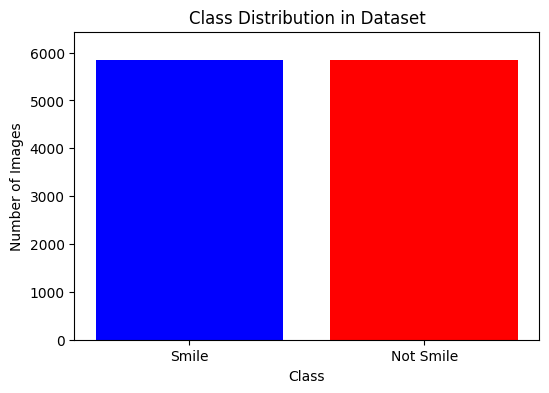

In [ ]:
# Define dataset paths
smiles_folder = '/kaggle/input/maybeeee/SmileClassification_Dataset/training/positives_Smile'
not_smiles_folder = '/kaggle/input/maybeeee/SmileClassification_Dataset/training/negatives_No_Smile'

# Function to count images in a folder
def count_images(folder):
    if os.path.exists(folder):
        return len([f for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
    return 0

# Count images
num_smiles = count_images(smiles_folder)
num_not_smiles = count_images(not_smiles_folder)

# Total images
total_images = num_smiles + num_not_smiles

# Calculate percentage distribution
smile_percentage = (num_smiles / total_images) * 100
not_smile_percentage = (num_not_smiles / total_images) * 100

# Print results
print(f"Total 'Smile' images: {num_smiles} ({smile_percentage:.2f}%)")
print(f"Total 'Not Smile' images: {num_not_smiles} ({not_smile_percentage:.2f}%)")
print(f"Total training images: {total_images}")

# Plot a bar chart to visualize class distribution
plt.figure(figsize=(6, 4))
plt.bar(["Smile", "Not Smile"], [num_smiles, num_not_smiles], color=['blue', 'red'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.ylim(0, max(num_smiles, num_not_smiles) * 1.1)  # Set y-axis limit
plt.show()


(11702, 2)


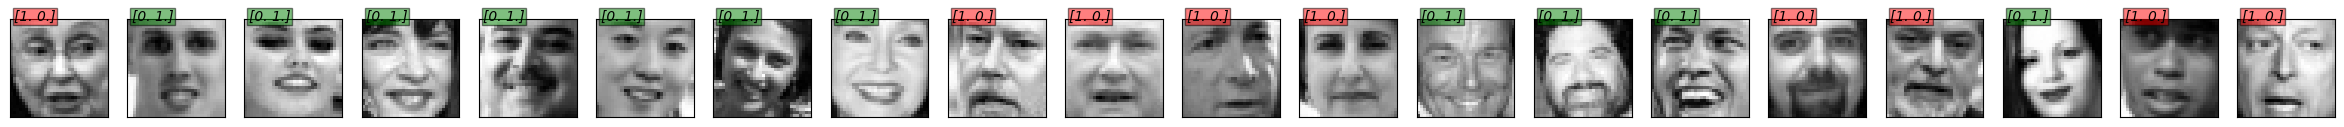

In [ ]:
# STUDY THIS
# g_train = gen(data_train, 20, 256, 256, istraing=True)
# x, y = next(g_train)

print(y.shape)

n = 20  # how many images we will display
plt.figure(figsize=(30, 10))
for i in range(0, n):
    # Display the image
    ax = plt.subplot(2, n, i + 1)
   # img = tf.keras.layers.RandomBrightness((-0.05,0.05))(train_X[i])
    img = train_X[i]
    plt.imshow(img,cmap='gray')

    # Determine label and box color
    label = train_y[i]
    color = 'green' if label[1]==1 else 'red'

    # Add text and box
    ax.text(
        0.95, 0.01, '{}'.format(label),
        style='italic',
        bbox={'facecolor': color, 'alpha': 0.5, 'pad': 1}
    )

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:
print("x type:", type(x))
print("x shape:", x.shape)
print("x dtype:", x.dtype)



x type: <class 'numpy.ndarray'>
x shape: (11702, 32, 32, 1)
x dtype: float64


In [ ]:
print("train_y shape:", train_y.shape)
print("Sample y[0]:", train_y[0])
print("Unique row values in y:", np.unique(train_y, axis=0))


train_y shape: (8191, 2)
Sample y[0]: [1. 0.]
Unique row values in y: [[0. 1.]
 [1. 0.]]


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# # Define base directory
# base_dir = "/kaggle/input/smile-classification/SmileClassification_Dataset/training"

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% training, 20% validation
)

# Create generators
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load pre-trained InceptionResNetV2 model (excluding top)
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("best_smile_model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Fine-tuning: Unfreeze some of the base layers
base_model.trainable = True
for layer in base_model.layers[:500]:
    layer.trainable = False  # Keep early layers frozen

# Recompile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tuning
history_fine = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Save final model
model.save("final_smile_detection_model.keras")

Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 100s 164ms/step - accuracy: 0.5346 - loss: 2.9772 - val_accuracy: 0.4848 - val_loss: 0.6941 - learning_rate: 0.0010
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6229 - loss: 0.9540 - val_accuracy: 0.6813 - val_loss: 0.6879 - learning_rate: 0.0010
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6930 - loss: 0.7897 - val_accuracy: 0.7468 - val_loss: 0.5183 - learning_rate: 0.0010
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7351 - loss: 0.7164 - val_accuracy: 0.7650 - val_loss: 1.4135 - learning_rate: 0.0010
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7422 - loss: 0.7382 - val_accuracy: 0.7787 - val_loss: 1.7077 - learning_rate: 0.0010
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7773 - loss: 0.7329 - val_accuracy: 0.5386 - val_loss: 13.2654 - learning_rate: 0.0010
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7237

In [ ]:
# Assuming the model has been trained and you want to save it
model.save('lastlap.keras')

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Accuracy: 84.28%
Precision: 86.35%
Recall: 82.53%
F1-Score: 84.40%

Classification Report:
              precision    recall  f1-score   support

   Not Smile       0.82      0.86      0.84      1702
       Smile       0.86      0.83      0.84      1809

    accuracy                           0.84      3511
   macro avg       0.84      0.84      0.84      3511
weighted avg       0.84      0.84      0.84      3511

Inference Time: 0.18 ms/frame
Model Size: 0.00 MB
Frames Per Second (FPS): 30


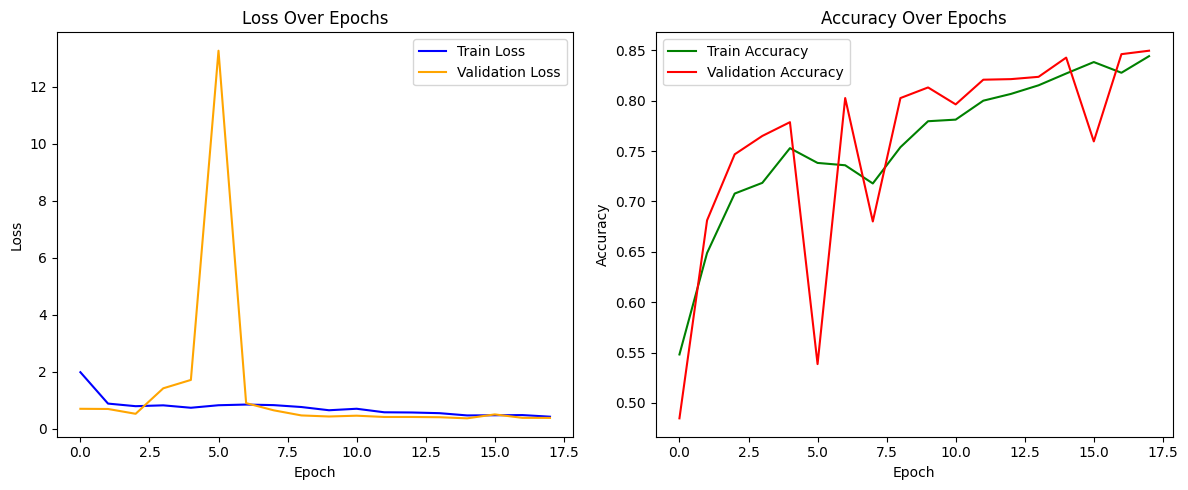

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# --- Make Predictions ---
start_time = time.time()
y_pred_probs = model.predict(test_X)

# Handle model output: EfficientNet with 2-class sigmoid likely gives shape (N, 2)
# If using sigmoid with 2 classes, you may need argmax
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probs to class indices

# If test_y is one-hot encoded (e.g., [0, 1] or [1, 0]), convert to class indices
if test_y.shape[-1] == 2:
    test_y_flat = np.argmax(test_y, axis=1)
else:
    test_y_flat = test_y.flatten()

# --- Evaluation Metrics ---
accuracy = accuracy_score(test_y_flat, y_pred)
precision = precision_score(test_y_flat, y_pred)
recall = recall_score(test_y_flat, y_pred)
f1 = f1_score(test_y_flat, y_pred)

# --- Print Evaluation Results ---
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(test_y_flat, y_pred, target_names=['Not Smile', 'Smile']))

# --- Real-time Evaluation Placeholders ---
model_path = 'path/to/your/model.h5'  # Adjust accordingly
if os.path.exists(model_path):
    model_size_mb = os.path.getsize(model_path) / (1024 * 1024)
else:
    model_size_mb = 0.0  # Placeholder

inference_time = (time.time() - start_time) / len(test_X) * 1000  # ms/frame
fps = 30  # Replace with actual measurement if available

print(f"Inference Time: {inference_time:.2f} ms/frame")
print(f"Model Size: {model_size_mb:.2f} MB")
print(f"Frames Per Second (FPS): {fps}")

# --- Plot Training History ---
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = model.predict(test_X_rgb).flatten()  # Ensure it's a 1D array

# Use the best threshold found (0.53)
best_threshold = 0.50

# Generate final predictions based on the best threshold
y_pred = (y_pred_probs > best_threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Smile', 'Smile'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix\nThreshold: {best_threshold:.2f}")
plt.show()

# Compute and print the F1-score and classification report
f1 = f1_score(test_y, y_pred, average='binary')
print(f"F1 Score (Threshold={best_threshold}): {f1:.4f}")

# Compute and print the accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy (Threshold={best_threshold}): {accuracy:.4f}")


NameError: name 'test_X_rgb' is not defined

In [ ]:
# Load the trained model
model = load_model('/kaggle/working/e3fodd_smile_aftertraining.h5')

# Define test dataset directories
test_datasets = [
    "/kaggle/input/maybeeee/SmileClassification_Dataset/test_For_Eva",
    "/kaggle/input/ewtrwtr/test"
]

# Function to preprocess images
def preprocess_images(image_folder, target_size=(32, 32)):
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_paths:
        return np.array([]), []

    random.shuffle(image_paths)  # Shuffle images to avoid same order
    images = []

    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, target_size)  # Resize to match model input size
        img = img / 255.0  # Normalize pixel values
        images.append(img)

    return np.array(images), image_paths  # Return images and their paths

# Loop through each test dataset
for dataset in test_datasets:
    print(f"\n🔹 Testing on dataset: {dataset}")

    # Preprocess images from the dataset
    test_images, test_image_paths = preprocess_images(dataset)

    if len(test_images) == 0:
        print(" No images found in this dataset.")
        continue  # Skip this dataset if empty

    # Make predictions
    predictions = model.predict(test_images)

    # Convert predictions to binary labels (0 = No Smile, 1 = Smile)
    predicted_labels = (predictions >= 0.5).astype(int)

    # Randomly select images to display
    num_images_to_show = min(10, len(test_images))
    random_indices = np.random.choice(len(test_images), num_images_to_show, replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(test_images[idx])
        label = "Smile" if predicted_labels[idx] == 1 else "Not Smile"
        plt.title(f"{label} ({predictions[idx][0]:.2f})")
        plt.axis('off')

    plt.show()

    # OPTIONAL: Compute accuracy if labels are available
    labels_csv = os.path.join(dataset, "labels.csv")  # Path to CSV containing labels
    if os.path.exists(labels_csv):
        labels_df = pd.read_csv(labels_csv)
        labels_dict = dict(zip(labels_df["image_name"], labels_df["label"]))  # Convert to dictionary

        # Extract true labels
        true_labels = [labels_dict.get(os.path.basename(path), 0) for path in test_image_paths]

        # Compute accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f" Accuracy on {dataset}: {accuracy:.2f}")
